# Using Yelp Data to Recommend the Location of the Next Lou Malnati: Data Wrangling and EDA
Chicago pizza magnate Lou Malnati is looking to expand his national pizza empire. With 59 locations in Illinois, seven in Arizona, four in Wisconsin, and four in Indiana. Malnati is interested in potentially expanding both within Arizona and Indiana and to other states. In particular, Malnati is interested in Florida, Pennsylvania, New Jersey, and Missouri. 
Malnati’s restaurants are known for their deep dish pizza, and are looking for locations that either might not have deep dish options or locations where the pizza options are not satisfying consumers. Malnati's team believes that they can both introduce deep dish to new customers and lure currently unsatisfied customers with their nationally recognized pizza brand. 
Malnati’s team has requested an analysis of the existing landscape in the four new states along with Arizona and Indiana. They want to understand which state holds the most promise for more or more new locations. Ideally, they would like to open up multiple locations and want to know whether one of the new states would be a better option than continuing to open up restaurants in Arizona and Indiana.

**The purpose of this notebook is to clean and explore the business and review dataframes that were loaded and previewed in the 1-ridgway-read-data notebook.**

## Data Sources
All data has been downloaded directly from [Yelp](https://www.yelp.com/dataset):

1. yelp_academic_dataset_business.json: contains business data including location data, attributes, and categories
2. yelp_academic_dataset_review.json: contains full review text data including the user_id that wrote the review and the business_id the review is written for.

The data was loaded and read into pandas dataframes in the 1-ridgway-read-data notebook. The dataframes were filtered for only businesses with "pizza" in the categories and then pickled:

- business.pkl: pickled dataframe containing 7093 pizza businesses
- review.pkl: pickled dataframe containing 475,819 reviews for pizza businesses 

## Changes
- 03-10-22: Started project
- 03-14-22: Cleaned data
- 03-16-22: EDA

## Summary of EDA

1. **Filtering:** The business dataset has been filtered to only include the six states being researched for the client. The total number of businesses has decreased from 7,093 to 5,314. The reviews dataset was also filtered, resulting in a decrease from 475,819 reviews to 346,149 reviews.
2. **Duplicates:** A check was conducted to see if there are any duplicate businesses, using the business_id column specifically. The same process was done using the reviews dataframe. Zero duplicates were found in both datasets.
3. **Missing Values:** For both datasets, there were only two columns that had any null values: the attributes and hours columns of the business_df. No businesses were dropped as those columns/features might not be needed for the analysis.
4. **Datatype Conversions:** For both datasets, there was only one column that required a datatype conversion: date in the reviews_df. The date column was originally a string and was converted to a datetime datatype.
5. **Outliers:** The numerical features for both datasets were reviewed to see if there are any outliers. For example, the maximum number of stars is 5; is_open is binary. No outliers were detected.
6. **Location Data:** Plotting the businesses for each state demonstrates that most businesses are clustered in specific parts of the state.
7. **Categorical Data (State/City/Postal Code):** The distribution of the dataset by state is not balanced. PA has the most businesses by far with 40%. Florida accounts for 20% of the businesses and Missouri, New Jersey, and Indian each account for ~10-13%. AZ has the least number of pizza businesses with 5%. The distribution of the dataset by city is also not balanced. A single city, Philadelphia, PA, accounts for 15% of the businesses. There are four cities that account for 4-7% of the businesses: Indianapolis, Tampa, Saint Louis, and Tucson. The rest of the cities represent fewer than 2% of the businesses. As expected, the number of businesses by postal code is at or less than 1% per code. The top two most frequent postal codes are located in Philadephia, PA.
8. **Categorical Data (Categories):** About 25% of the categories contain just "Pizza" and "Restaurant." Another 10% contain "Pizza," "Restaurant," and "Italian." Most of the top categories associated with pizza are general. However, there are few terms that indicate the restaurant serves other types of food, including sandwiches, chicken wings, and salad. Given that Lou Malnati also serves these items, it is worth exploring if particular cities or states also serve these items. Note that none of the categories include the terms "Deep" or "Dish." There is some variation in the percentage of pizza businesses serving Malnati sides by state. FL has the most with 40%; PA has the least with 30%. Notably, PA has the lowest percentage while having the highest number of businesses. There is also variation in percentage of businesses serving Malnati sides by city. Philadelphia, which has the most pizza businesses of any of the top 10 cities, has the lowest percetage of businesses serving Malnati sides. Note that there are 3 Lou Malnati restuarants in the dataset - none of which include any of the side categories.
9. **Categorical Data (Reviews and Reviewers):** The number of reviews varies by states. Of the 346,149, the majority are in PA and FL. The number of reviews varies by city as well. The vast majority are in Philadelphia, with similar numbers of reviews in Tucson, Indianapolis, Tampa, and Saint Louis. The number of unique reviewers is similar to the number of reviews when disaggregating by state. The only difference is that NJ and AZ are switched for second to least and least. The number of unique reviewers is similar to the number of reviews when disaggregating by city.
10. **Numerical Data (Star Ratings):** Star ratings appear to be quite consistent by state. NJ and FL have a slightly higher average rating (~3.4) compared to MO and AZ (~3.3).
11. **Numerical Data (Review Count):** There is much more variation in the average number of reviews by state. AZ has the highest average by far with ~106 reviews. MO and FL have around 70, PA and IN have around 60, and NJ has 38.
12. **Numerical Data (Open vs. Closed):** The percent of businesses open varies by state. AZ and NJ have 79% and 77% of their businesses open, which is above average. IN and PA are around the average of 71% and MO and FL (68% and 67%) are slightly below average. When considering the top 10 cities for number of businesses, there is also variation. Only one of the top-10 cities is above average (Tuscon), while 5 are 9% or more under the average. Of those five cities, three are in FL.
13. **Time Data:** Both the number of reviews and reviewers increased from 2005 to 2019. There was a sharp decline in 2020 and 2021; 2022 is much lower however this analysis is conducted in March of 2022. The percentage of businesses open declined from 2005 to 2008 and stayed relatively constantly through 2014. The percentage of businesses open has increased roughly 20-25% since 2018. The average rating declined from 2005 through 2009 where it stayed relatively consistent through 2016. There was a slight increase in 2017 with the average star rating staying relatively consistent since then.
14. **Text Data:** The most common words are pizza, order, good, place, food, great.

## Import Libraries

In [1]:
# Libraries for data manipulation and graphing
import pandas as pd
import numpy as np
#import json
#import string
#import os
#import re
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Libraries for mapping
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import glob
from pathlib import Path

# Libraries for NLP pre-processing
import nltk
nltk.download()
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk import pos_tag
from nltk import pos_tag_sents
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.probability import FreqDist

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajaridgway/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rajaridgway/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## File Locations

In [2]:
business_pkl_df = '../data/interim/business.pkl'
review_pkl_df = '../data/interim/review.pkl'

## Load Data

In [3]:
business_df = pd.read_pickle(business_pkl_df)
reviews_df = pd.read_pickle(review_pkl_df)

## Clean Data

Cleaning the data includes:
- Filter by specific states: Arizona, Indiana, Florida, Pennslyvania, New Jersey, and Missouri.
- Checking for duplicate businesses
- Checking for missing values
- Converting data types
- Check for outliers in numerical features

### Filtering for Specific States

In [4]:
# Filter and confirm that only the six desired states are included
states_list = ['AZ', 'IN', 'FL', 'PA', 'NJ', 'MO']

business_df = business_df[business_df['state'].isin(states_list)]

print('States included in the business df include:', business_df['state'].unique())

States included in the business df include: ['PA' 'FL' 'AZ' 'IN' 'MO' 'NJ']


In [5]:
# Determine the number of businesses remaining after the filter
business_df.shape[0]

5314

In [6]:
# Filter the review df 
business_ids = list(business_df['business_id'].unique())
reviews_df = reviews_df[reviews_df['business_id'].isin(business_ids)]

In [7]:
# Determine the number of reviews remaining after the filter
reviews_df.shape[0]

346149

<div class="alert alert-block alert-info">
The business dataset has been filtered to only include the six states being researched for the client. The total number of <b>businesses has decreased from 7,093 to 5,314</b>. The reviews dataset was also filtered, resulting in a decrease from <b>475,819 reviews to 346,149 reviews.</b>
</div>

### Checking for Duplicates

In [8]:
# Check for duplicate businesses by business_id
business_df[business_df.duplicated(subset=['business_id']) == True]

Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []

In [9]:
# Check for duplicate reviews by review_id
reviews_df[reviews_df.duplicated(subset=['review_id']) == True]

Empty DataFrame
Columns: [review_id, user_id, business_id, stars, useful, funny, cool, text, date]
Index: []

<div class="alert alert-block alert-info">
A check was conducted to see if there are any duplicate businesses, using the business_id column specifically. The same process was done using the reviews dataframe. <b>Zero duplicates were found in both datasets.</b>
</div>

### Checking for Missing Data

In [10]:
# Count the number of null values in each column of the business dataframe
business_df.isnull().sum()

business_id       0
name              0
address           0
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes       61
categories        0
hours           770
dtype: int64

In [11]:
# Count the number of null values in each column of the reviews dataframe
reviews_df.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

<div class="alert alert-block alert-info">
For both datasets, there were only two columns that had any null values: the attributes and hours columns of the business_df. <b>No businesses were dropped as those columns/features might not be needed for the analysis.</b>
</div>

### Convert Datatypes

In [12]:
business_df.head(3)

business_id              name                address  \
31  Mjboz24M9NlBeiOJKLEd_Q  DeSandro on Main           4105 Main St   
33  kV_Q1oqis8Qli8dUoGpTyQ     Ardmore Pizza      10 Rittenhouse Pl   
59  JgpnXv_0XhV3SfbfB50nxw       Joe's Pizza  2038 N Dale Mabry Hwy   

            city state postal_code   latitude  longitude  stars  review_count  \
31  Philadelphia    PA       19127  40.022466 -75.218314    3.0            41   
33       Ardmore    PA       19003  40.006707 -75.289671    3.5           109   
59         Tampa    FL       33607  27.960514 -82.506127    4.0            35   

    is_open                                         attributes  \
31        0  {'RestaurantsReservations': 'False', 'Caters':...   
33        1  {'RestaurantsGoodForGroups': 'True', 'WiFi': '...   
59        0  {'BusinessParking': '{'garage': False, 'street...   

                         categories  \
31  Pizza, Restaurants, Salad, Soup   
33               Pizza, Restaurants   
59               Restaurants, Pizza   

                                                hours  
31  {'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...  
33  {'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...  
59  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...

In [13]:
# Check the datatypes of the business dataset
business_df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [14]:
reviews_df.head(3)

review_id                 user_id             business_id  \
12  XW_LfMv0fV21l9c6xQd_lw  9OAtfnWag-ajVxRbUTGIyg  lj-E32x9_FA7GmUrBGBEWg   
13  8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ   
21  ZVvhc3Go7v5I8XTiVoWmqQ  WBpQDAZymU0dhIqXcACGNw  ut6fi2W2YaipNOqvi7e0jw   

    stars  useful  funny  cool  \
12    4.0       0      0     0   
13    4.0       0      0     0   
21    3.0       0      0     0   

                                                 text                 date  
12  Love going here for happy hour or dinner!  Gre...  2014-06-27 22:44:01  
13  Good food--loved the gnocchi with marinara\nth...  2009-10-14 19:57:14  
21  Upland is a brewery based out of Bloomington, ...  2014-11-12 14:12:20

In [15]:
# Check the datatypes of the business dataset
reviews_df.dtypes

review_id       object
user_id         object
business_id     object
stars          float64
useful           int64
funny            int64
cool             int64
text            object
date            object
dtype: object

In [16]:
# Convert the date column to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

<div class="alert alert-block alert-info">
For both datasets, there was only one column that required a datatype conversion: date in the reviews_df. <b>The date column was originally a string and was converted to a datetime datatype.</b>
</div>

### Check for Outliers in Numerical Features

In [17]:
# Check the datatypes of the business dataset
business_df.describe()

latitude    longitude        stars  review_count      is_open
count  5314.000000  5314.000000  5314.000000   5314.000000  5314.000000
mean     37.043885   -81.211451     3.364791     62.457659     0.712834
std       4.847417     8.654149     0.817315    111.474707     0.452482
min      27.613073  -111.126426     1.000000      5.000000     0.000000
25%      32.426985   -86.022881     3.000000     14.000000     0.000000
50%      39.869562   -75.572650     3.500000     28.000000     1.000000
75%      40.011498   -75.149166     4.000000     66.000000     1.000000
max      40.442610   -74.690700     5.000000   2893.000000     1.000000

In [18]:
# Check the datatypes of the reviews dataset
reviews_df.describe()

stars         useful          funny           cool
count  346149.000000  346149.000000  346149.000000  346149.000000
mean        3.692289       0.917625       0.270239       0.394004
std         1.456332       2.335065       1.247980       1.733318
min         1.000000       0.000000       0.000000       0.000000
25%         3.000000       0.000000       0.000000       0.000000
50%         4.000000       0.000000       0.000000       0.000000
75%         5.000000       1.000000       0.000000       0.000000
max         5.000000     189.000000     227.000000     175.000000

<div class="alert alert-block alert-info">
The numerical features for both datasets were reviewed to see if there are any outliers. For example, the maximum number of stars is 5; is_open is binary. <b>No outliers were detected.</b>
</div>

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) includes:
1. **Location data:** maps to show businesses by state
2. **Categorical data:** distributions using bar charts (city, state, postal code, categories)
3. **Numerical data:** distributions using histograms and and boxplots (stars for both datasets, review counts, open/closed)
4. **Time data:** distributions using historgrams to show review counts by year
5. **Text data:** preparing data using tokenization, stemming, lemmatization, stop word removal then frequency analysis by state and top city

### Location Data
Maps downloaded from the [2020 US Census](https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html). 

In [19]:
# Define a function for plotting the map
def plot_business_map(state):
    # Get the appropriate shp file
    path = Path(f'../maps/{state}/')
    extension = '.shp'
    shp_file = next(path.glob(f'*{extension}'))
    state_map = gpd.read_file(f'{shp_file}')
    
    # Filter the business_df 
    business_df_state = business_df[business_df['state'] == f'{state}']
    
    # Create a feature of the latitude and longtitude
    gdf = gpd.GeoDataFrame(business_df_state, 
                           geometry = gpd.points_from_xy(business_df_state['longitude'], business_df_state['latitude']))
    
    # Plot the map with data points
    fig, ax = plt.subplots(figsize=(10,10))
    state_map.plot(ax=ax, alpha=0.4,color='white', edgecolor='black')
    gdf.plot(color = 'blue', ax=ax, legend='True')
    plt.title(f'Pizza Business Locations - {state}', fontsize=15, fontweight='bold')
    
    plt.show()

In [20]:
# Define a function for plotting the map with zoom based on points (with color for open or closed)
def plot_business_map_zoom(state):
    # Get the appropriate shp file
    path = Path(f'../maps/{state}/')
    extension = '.shp'
    shp_file = next(path.glob(f'*{extension}'))
    state_map = gpd.read_file(f'{shp_file}')
    
    # Filter the business_df 
    business_df_state = business_df[business_df['state'] == f'{state}']
    
    # Create a feature of the latitude and longtitude
    gdf = gpd.GeoDataFrame(business_df_state, 
                           geometry = gpd.points_from_xy(business_df_state['longitude'], business_df_state['latitude']))
    
    # Plot the map with data points
    fig, ax = plt.subplots(figsize=(15,15))
    state_map.plot(ax=ax, alpha=0.4,color='white', edgecolor='black')
    gdf.plot(column='is_open', ax=ax, legend='True')
    plt.title(f'Pizza Business Locations - {state} (Zoomed) with Open (1) and Closed (0)', fontsize=15, fontweight='bold')
    
    # Zoom in to show the distribution better
    minx, miny, maxx, maxy = gdf.total_bounds
    ax.set_xlim(minx-0.5, maxx+0.5)
    ax.set_ylim(miny-0.5, maxy+0.5)
    
    plt.show()

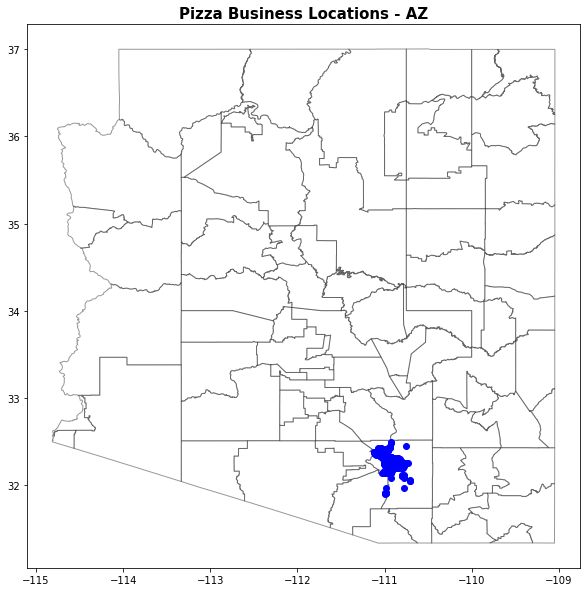

In [21]:
plot_business_map('AZ')

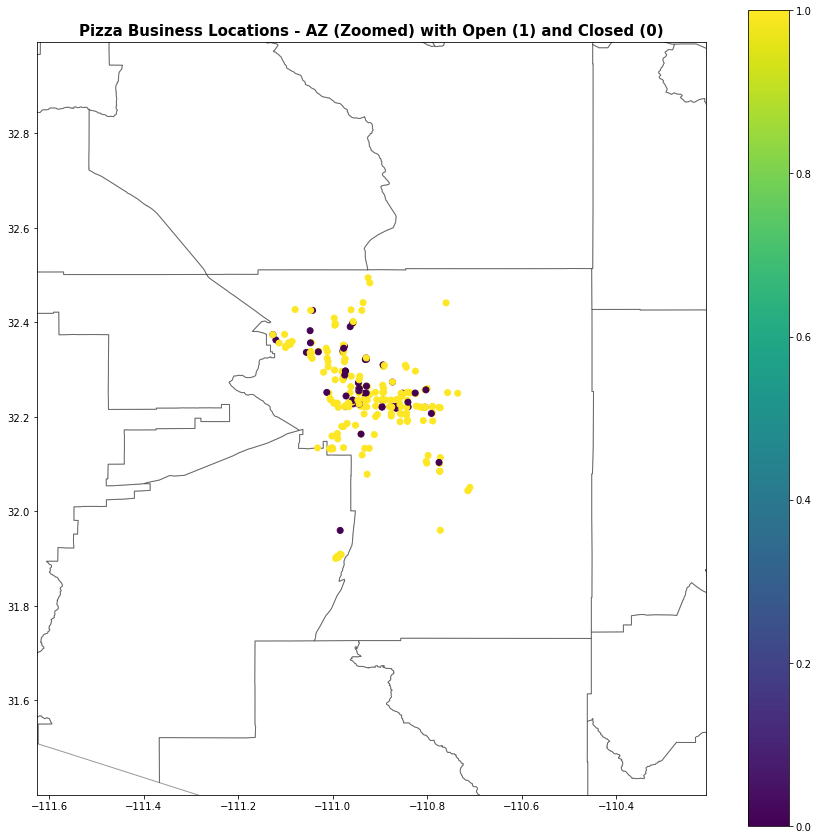

In [22]:
plot_business_map_zoom('AZ')

In [23]:
plot_business_map('FL')

In [24]:
plot_business_map_zoom('FL')

In [25]:
plot_business_map('IN')

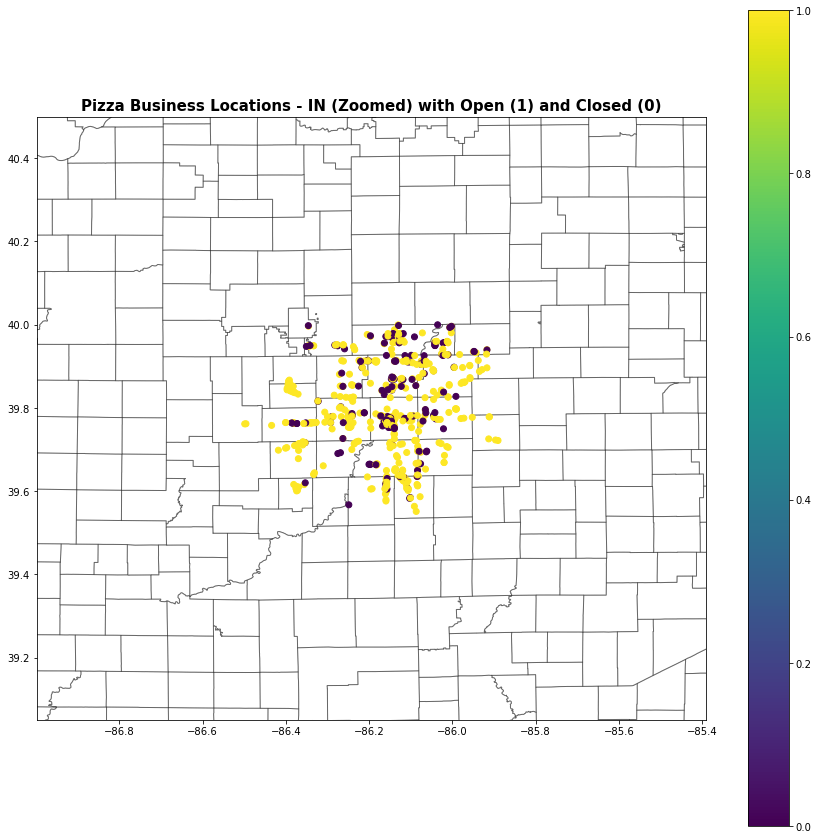

In [26]:
plot_business_map_zoom('IN')

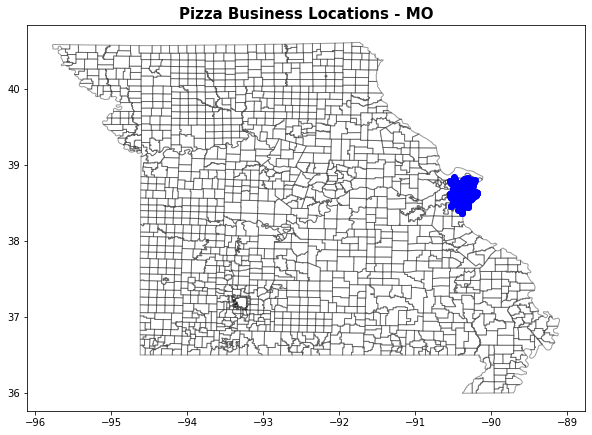

In [27]:
plot_business_map('MO')

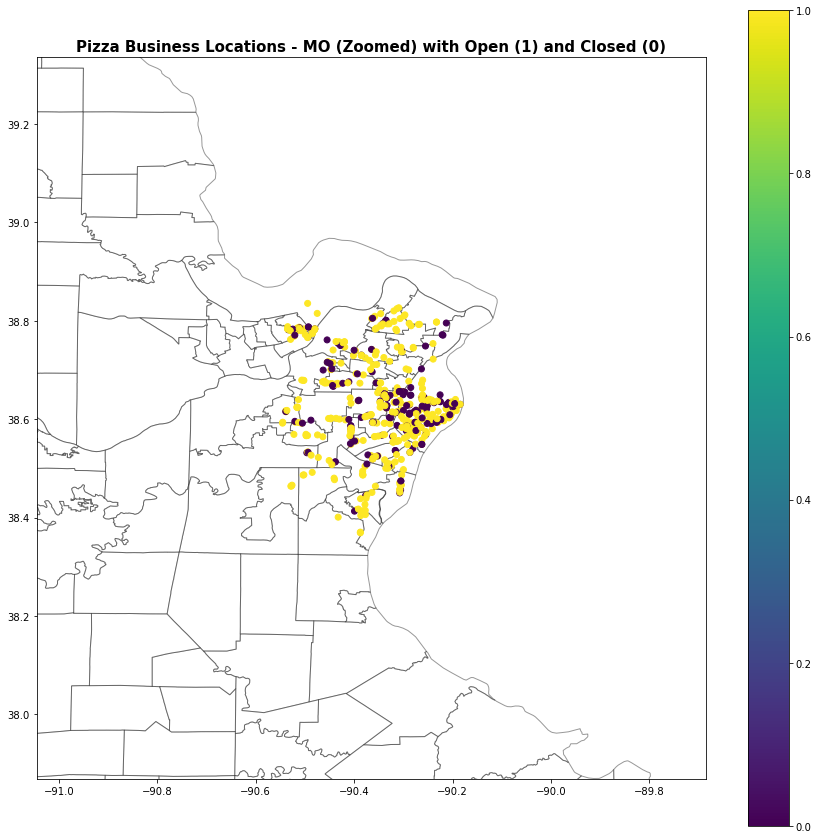

In [28]:
plot_business_map_zoom('MO')

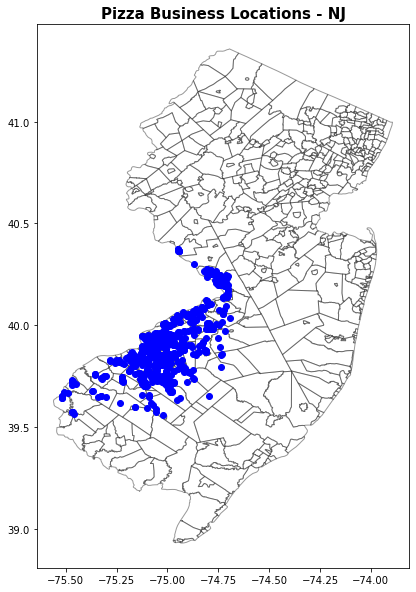

In [29]:
plot_business_map('NJ')

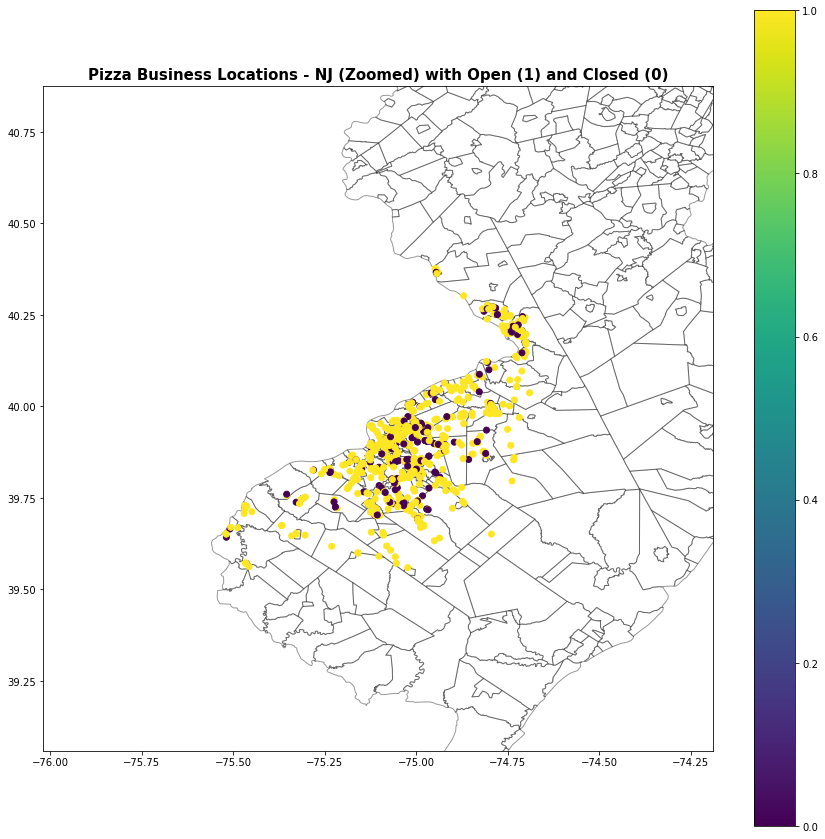

In [30]:
plot_business_map_zoom('NJ')

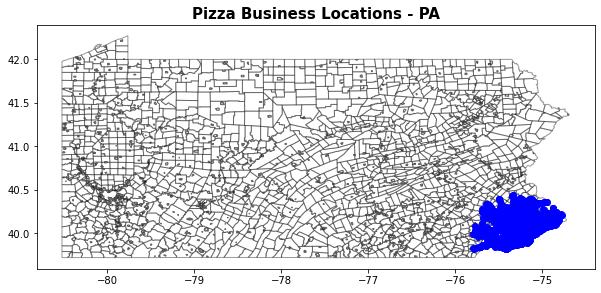

In [31]:
plot_business_map('PA')

In [32]:
plot_business_map_zoom('PA')

<div class="alert alert-block alert-info">
Plotting the businesses for each state demonstrates that most businesses are clustered in specific parts of the state.
</div>

### Categorical Data

#### State, City, and Postal Code

In [33]:
# Create a dataframe of the counts by state
state_counts = pd.DataFrame(business_df['state'].value_counts()).reset_index().rename(columns={'index': 'State', 'state': 'Count'})

In [34]:
# Plot the count of states
fig = px.bar(state_counts, x='State', y='Count', text_auto=True, title='Count of Pizza Businesses by State')
fig.show()

In [35]:
# Identify the percentage of the total businesses by state
business_df['state'].value_counts(normalize=True)*100

PA    40.045164
FL    20.154309
NJ    13.492661
IN    11.121566
MO    10.237110
AZ     4.949191
Name: state, dtype: float64

<div class="alert alert-block alert-info">
    <b>The distribution of the dataset by state is not balanced.</b> PA has the most businesses by far with 40%. Florida accounts for 20% of the businesses and Missouri, New Jersey, and Indian each account for ~10-13%. AZ has the least number of pizza businesses with 5%.
</div>

In [36]:
# Add a column with city, state
business_df['city_state'] = business_df['city'] + ', ' + business_df['state']

In [37]:
# Create a dataframe of the counts by city with city/state pairing
city_counts = pd.DataFrame(business_df['city_state'].value_counts()).reset_index().rename(columns={'index': 'City', 'city_state': 'Count'})

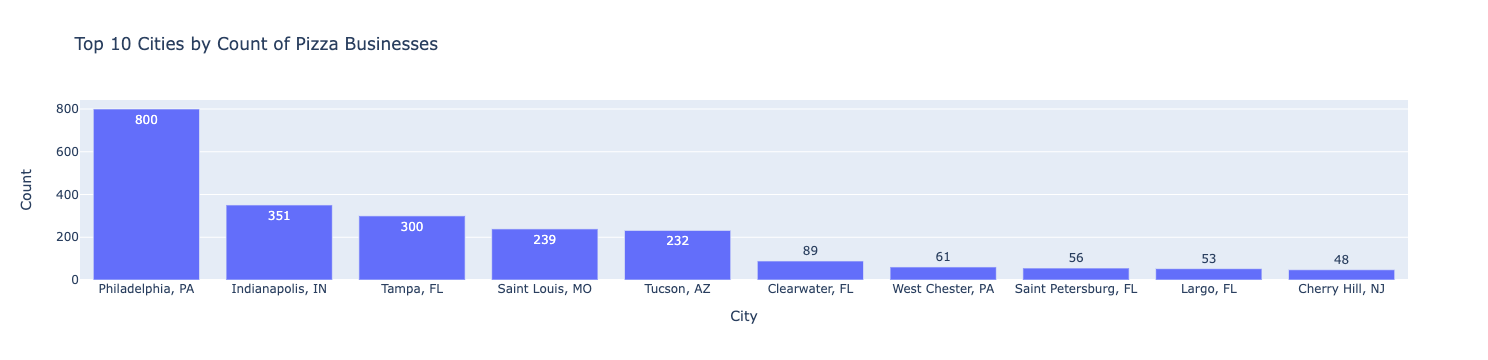

In [38]:
# Plot the count of the top 10 cities
fig = px.bar(city_counts.head(10), x='City', y='Count', text_auto=True, title='Top 10 Cities by Count of Pizza Businesses')
fig.show()

In [39]:
# Identify the percentage of the total businesses by city/state
business_df['city_state'].value_counts(normalize=True).head(10)*100

Philadelphia, PA        15.054573
Indianapolis, IN         6.605194
Tampa, FL                5.645465
Saint Louis, MO          4.497554
Tucson, AZ               4.365826
Clearwater, FL           1.674821
West Chester, PA         1.147911
Saint Petersburg, FL     1.053820
Largo, FL                0.997365
Cherry Hill, NJ          0.903274
Name: city_state, dtype: float64

<div class="alert alert-block alert-info">
    <b>The distribution of the dataset by city is also not balanced.</b> A single city, Philadelphia, PA, accounts for 15% of the businesses. There are four cities that account for 4-7% of the businesses: Indianapolis, Tampa, Saint Louis, and Tucson. The rest of the cities represent fewer than 2% of the businesses.
</div>

In [40]:
# Identify the percentage of the total businesses by postal code
business_df['postal_code'].value_counts(normalize=True).head(10)*100

19147    1.016184
19104    1.016184
19020    0.771547
46032    0.696274
19103    0.696274
19148    0.621001
33511    0.621001
46204    0.602183
19107    0.602183
46142    0.583365
Name: postal_code, dtype: float64

<div class="alert alert-block alert-info">
    As expected, the number of businesses by postal code is at or less than 1% per code. The top two most frequent postal codes are located in Philadephia, PA.
</div>

#### Categories

In [41]:
# Determine the number of unique category sets
unique_categories = business_df['categories'].nunique()
print('There are', unique_categories, 'unique sets of categories in the dataset')

There are 2576 unique sets of categories in the dataset


In [42]:
# Identify the top 20 category sets
pd.DataFrame(business_df['categories'].value_counts(normalize=True).head(20)*100)

categories
Restaurants, Pizza                              13.624388
Pizza, Restaurants                              12.062476
Italian, Restaurants, Pizza                      1.994731
Pizza, Restaurants, Italian                      1.863003
Restaurants, Italian, Pizza                      1.750094
Restaurants, Pizza, Italian                      1.486639
Italian, Pizza, Restaurants                      1.430184
Pizza, Italian, Restaurants                      1.373730
Pizza, Sandwiches, Restaurants                   0.282273
Sandwiches, Restaurants, Pizza                   0.263455
Pizza, Restaurants, Food                         0.263455
Pizza, Restaurants, Sandwiches                   0.263455
Pizza, Chicken Wings, Restaurants, Sandwiches    0.263455
Pizza, Restaurants, Sandwiches, Chicken Wings    0.244637
Sandwiches, Restaurants, Pizza, Italian          0.225819
Restaurants, Pizza, Chicken Wings, Sandwiches    0.225819
Italian, Restaurants, Sandwiches, Pizza          0.225819
Pizza, Restaurants, Sandwiches, Italian          0.225819
Restaurants, Food, Pizza                         0.207000
Pizza, Restaurants, Fast Food                    0.207000

In [43]:
# Identify the bottom 20 category sets
pd.DataFrame(business_df['categories'].value_counts(normalize=True).tail(20)*100)

categories
Buffets, Italian, Sandwiches, Chicken Wings, Pi...    0.018818
Restaurants, Food, Pizza, Specialty Food, Pasta...    0.018818
Nightlife, Sports Bars, Restaurants, Pizza, Chi...    0.018818
Restaurants, Italian, Beer, Wine & Spirits, Foo...    0.018818
Pizza, Food Delivery Services, Food, Restaurant...    0.018818
Pizza, American (Traditional), Sandwiches, Rest...    0.018818
Greek, Breakfast & Brunch, American (New), Rest...    0.018818
Italian, Seafood, Sandwiches, Restaurants, Pizza      0.018818
Nightlife, Bars, Pizza, Restaurants, Dive Bars,...    0.018818
Pizza, Restaurants, Cocktail Bars, Bars, Nightl...    0.018818
Pizza, Italian, Sandwiches, Restaurants, Chicke...    0.018818
Gluten-Free, Restaurants, Pizza, Vegan                0.018818
Salad, Food Delivery Services, Italian, Event P...    0.018818
Restaurants, Pizza, Chicken Wings, Italian, Salad     0.018818
Italian, Pizza, Seafood, Restaurants                  0.018818
American (New), Seafood, Event Planning & Servi...    0.018818
Pizza, Food, Breweries, American (New), Restaur...    0.018818
Pizza, Sandwiches, American (Traditional), Rest...    0.018818
Restaurants, Food, Italian, Pizza, Food Trucks        0.018818
Bars, Beer Bar, Nightlife, Wine Bars, Pizza, Re...    0.018818

<div class="alert alert-block alert-info">
    About 25% of the categories contain just "Pizza" and "Restaurant." Another 10% contain "Pizza," "Restaurant," and "Italian." 
</div>

In [44]:
# Create a list of strings that contain the categories in each record
category_groups = list(business_df['categories'].explode())

In [45]:
# Convert category groups into a list of lists so that each category is now a single string
all_categories = []

for i in range(0,len(category_groups)):
    all_categories.append(category_groups[i].split(','))

In [46]:
# Flatten the list of lists in a single list of the categories
all_categories = [categories for sublist in all_categories for categories in sublist]

In [47]:
# Convert the list to a pandas df
all_categories_df = pd.DataFrame(all_categories, columns=['Categories'])

In [48]:
# Strip whitespace
all_categories_df['Categories'] = all_categories_df['Categories'].str.strip()

In [49]:
# Determine how many unique categories in the dataset
all_categories_df['Categories'].nunique()

303

In [50]:
# Determine the top 10 categories
category_counts = pd.DataFrame(all_categories_df['Categories'].value_counts()).reset_index().rename(columns={'index': 'Category', 
                                                                                                             'Categories': 'Count'})

In [51]:
# Plot the top 10 categories
fig = px.bar(category_counts.head(10), x='Category', y='Count', text_auto=True, title = 'Top 10 Most Common Categories')
fig.show()

In [52]:
# Identify if 'Deep' or 'Dish' is a category
category_counts[category_counts['Category'].isin(['Deep', 'Dish'])]

Empty DataFrame
Columns: [Category, Count]
Index: []

<div class="alert alert-block alert-info">
Most of the top categories associated with pizza are general. However, <b>there are few terms that indicate the restaurant serves other types of food, including sandwiches, chicken wings, and salad.</b> Given that Lou Malnati also serves these items, it is worth exploring if particular cities or states also serve these items. Note that none of the categories include the terms "Deep" or "Dish."
</div>

In [53]:
# Create a column to identify whether the business serves at least one of the Malnati sides
business_df['malnati_sides'] = np.where((business_df['categories'].str.contains('Salad')) \
                                        | (business_df['categories'].str.contains('Chicken Wings')) \
                                        | (business_df['categories'].str.contains('Sandwiches')), 1, 0)

In [54]:
# Identify the percentage of businesses in each state that serve at least on the Malnati sides
sides_pers = round(business_df.groupby(['state'])['malnati_sides'].sum()/business_df.groupby(['state'])['business_id'].count()*100)
sides_pers = pd.DataFrame(sides_pers).reset_index().rename(columns={'state': 'State', 0: 'Percentage of Businesses'})
sides_pers = sides_pers.sort_values(by='Percentage of Businesses', ascending = False)

In [55]:
# Plot the % of businesses that serve Malnati sides by state
fig = px.bar(sides_pers, x='State', y='Percentage of Businesses', text_auto=True, 
             title = '% of Pizza Businesses Serving Malnati Sides - by State')
fig.show()

<div class="alert alert-block alert-info">
There is some variation in the percentage of pizza businesses serving Malnati sides by state. FL has the most with 40%; PA has the least with 30%. Notably, PA has the lowest percentage while having the highest number of businesses.
</div>

In [56]:
# Identify the percentage of businesses in each city that serve at least on the Malnati sides
sides_pers_city = round(business_df.groupby(['city_state'])['malnati_sides'].sum()/business_df.groupby(['city_state'])['business_id'].count()*100)
sides_pers_city = pd.DataFrame(sides_pers_city).reset_index().rename(columns={'city_state': 'City', 0: 'Percentage of Businesses'})
sides_pers_city = sides_pers_city.sort_values(by='Percentage of Businesses', ascending = False)

In [57]:
# Filter the cities to only include the top 10 cities for pizza businesses
top_10_cities = list(city_counts['City'].head(10))
sides_pers_city = sides_pers_city[sides_pers_city['City'].isin(top_10_cities)]

In [58]:
# Plot the % of businesses that serve Malnati sides by city
fig = px.bar(sides_pers_city.head(10), x='City', y='Percentage of Businesses', text_auto=True, 
             title = '% of Pizza Businesses Serving Malnati Sides - by City')
fig.show()

In [59]:
lou_malnati = business_df[business_df['name'].str.contains('Malnati')]
lou_malnati

business_id                                 name  \
6009    gCuC7255XLP-KGuFqYFaSw  Lou Malnati's Pizzeria  - Now Open!   
56815   Ex2HMTlX69xe1xFuUYeqJw               Lou Malnati's Pizzeria   
121470  imGqMr4h8AJRfL0bxL8cCQ               Lou Malnati's Pizzeria   

                              address          city state postal_code  \
6009                 6320 Ferguson St  Indianapolis    IN       46220   
56815   11435 Spring Mill Rd, Ste 170        Carmel    IN       46032   
121470                 2902 W 86th St  Indianapolis    IN       46268   

         latitude  longitude  stars  review_count  is_open  \
6009    39.871405 -86.144212    4.5            29        1   
56815   39.954000 -86.163850    4.0            89        1   
121470  39.912568 -86.211800    4.5            36        1   

                                               attributes  \
6009    {'RestaurantsDelivery': 'True', 'OutdoorSeatin...   
56815   {'BusinessParking': '{'garage': False, 'street...   
121470  {'RestaurantsDelivery': 'True', 'RestaurantsTa...   

                         categories  \
6009    Pizza, Restaurants, Italian   
56815            Pizza, Restaurants   
121470           Restaurants, Pizza   

                                                    hours        city_state  \
6009    {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  Indianapolis, IN   
56815   {'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...        Carmel, IN   
121470  {'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...  Indianapolis, IN   

        malnati_sides  
6009                0  
56815               0  
121470              0

<div class="alert alert-block alert-info">
There is also variation in percentage of businesses serving Malnati sides by city. Philadelphia, which has the most pizza businesses of any of the top 10 cities, has the lowest percetage of businesses serving Malnati sides. <b>Note that there are 3 Lou Malnati restuarants in the dataset - none of which include any of the side categories.</b>
</div>

#### Reviews and Reviewers

In [60]:
reviews_df.head(1)

review_id                 user_id             business_id  \
12  XW_LfMv0fV21l9c6xQd_lw  9OAtfnWag-ajVxRbUTGIyg  lj-E32x9_FA7GmUrBGBEWg   

    stars  useful  funny  cool  \
12    4.0       0      0     0   

                                                 text                date  
12  Love going here for happy hour or dinner!  Gre... 2014-06-27 22:44:01

In [61]:
# Identify the number of unique reviews
unique_reviews = reviews_df['review_id'].nunique()
print('There are', unique_reviews, 'unique reviews')

There are 346149 unique reviews


In [62]:
# Identify the number of unique reviewers
unique_reviewers = reviews_df['user_id'].nunique()
print('There are', unique_reviewers, 'unique reviewers')

There are 201411 unique reviewers


In [63]:
# Calculate the average number of reviews by user
avg_reviews_per_user = unique_reviews/unique_reviewers
print('The average number of reviews by user is:', round(avg_reviews_per_user))

The average number of reviews by user is: 2


In [64]:
# Add the state and city state to the reviews df
limited_business_df = business_df[['business_id', 'state', 'is_open', 'latitude', 'longitude', 'city_state']]
df = reviews_df.merge(limited_business_df, on='business_id')

In [65]:
# Calculate the number of reviews by state
reviews_count_state = df.groupby(['state'])['review_id'].count()
reviews_count_state = pd.DataFrame(reviews_count_state).reset_index().rename(columns={'state': 'State', 'review_id': 'Count'})
reviews_count_state = reviews_count_state.sort_values(by='Count', ascending = False)

In [66]:
# Plot the number of reviews by state
fig = px.bar(reviews_count_state.head(10), x='State', y='Count', text_auto=True, 
             title = 'Number of Reviews by State')
fig.show()

<div class="alert alert-block alert-info">
The number of reviews varies by states. Of the 346,149, the majority are in PA and FL. 
</div>

In [67]:
# Calculate the number of reviews by city
reviews_count_city = df.groupby(['city_state'])['review_id'].count()
reviews_count_city = pd.DataFrame(reviews_count_city).reset_index().rename(columns={'city_state': 'City', 'review_id': 'Count'})
reviews_count_city = reviews_count_city.sort_values(by='Count', ascending = False)

In [68]:
# Filter the cities to only include the top 10 cities for pizza businesses
reviews_count_city = reviews_count_city[reviews_count_city['City'].isin(top_10_cities)]

In [69]:
# Plot the number of reviews by city
fig = px.bar(reviews_count_city.head(10), x='City', y='Count', text_auto=True, 
             title = 'Number of Reviews by City')
fig.show()

<div class="alert alert-block alert-info">
The number of reviews varies by city as well. The vast majority are in Philadelphia, with similar numbers of reviews in Tucson, Indianapolis, Tampa, and Saint Louis.
</div>

In [70]:
# Calculate the number of reviewers by state
user_count_state = df.groupby(['state'])['user_id'].nunique()
user_count_state = pd.DataFrame(user_count_state).reset_index().rename(columns={'state': 'State', 'user_id': 'Count'})
user_count_state = user_count_state.sort_values(by='Count', ascending = False)

In [71]:
# Plot the number of reviewers by state
fig = px.bar(user_count_state.head(10), x='State', y='Count', text_auto=True, 
             title = 'Number of Unique Reviewers by State')
fig.show()

<div class="alert alert-block alert-info">
The number of unique reviewers is similar to the number of reviews when disaggregating by state. The only difference is that NJ and AZ are switched for second to least and least. 
</div>

In [72]:
# Calculate the number of reviewers by city
user_count_city = df.groupby(['city_state'])['user_id'].count()
user_count_city = pd.DataFrame(user_count_city).reset_index().rename(columns={'city_state': 'City', 'user_id': 'Count'})
user_count_city = user_count_city.sort_values(by='Count', ascending = False)

In [73]:
# Filter the cities to only include the top 10 cities for pizza businesses
user_count_city = user_count_city[user_count_city['City'].isin(top_10_cities)]

In [74]:
# Plot the number of reviewers by city
fig = px.bar(user_count_city.head(10), x='City', y='Count', text_auto=True, 
             title = 'Number of Unique Reviewers by City')
fig.show()

<div class="alert alert-block alert-info">
The number of unique reviewers is similar to the number of reviews when disaggregating by city.
</div>

### Numerical Data

#### Star Ratings

In [75]:
# Plot a histogram for the stars in the business_df
fig = px.histogram(business_df, x='stars', title='Distribution of Business Star-Ratings')
fig.show()

In [76]:
# Plot a boxplot for the stars in the business_df
fig = px.box(business_df, y='stars', title='Distribution of Business Star-Ratings - Boxplot', width=800, height=800)
fig.show()

In [77]:
# Plot a violin for the stars in the business_df
fig = px.violin(business_df, y='stars', title='Distribution of Business Star-Ratings - Violin Plot', width=800, height=800)
fig.show()

In [78]:
# Plot a histogram for the stars in the business_df by state
fig = px.histogram(business_df, x='stars', title='Distribution of Business Star-Ratings by State', facet_col = 'state', height = 600)
fig.show()

In [79]:
# Plot a boxplot for the stars in the business_df
fig = px.box(business_df, y='stars', x='state', title = 'Distribution of Business Star-Ratings by State - Boxplot', height = 800)
fig.show()

In [80]:
# Determine the average star rating by state
state_stars = business_df.groupby('state')['stars'].mean().sort_values(ascending=False).round(2)
state_stars = pd.DataFrame(state_stars).reset_index().rename(columns={'state': 'State', 'stars': 'Avg. Rating'})

In [81]:
# Plot the avg. rating by state
fig = px.bar(state_stars, x='State', y='Avg. Rating', text_auto=True, title='Avg. Rating by State')
fig.show()

<div class="alert alert-block alert-info">
    <b>Star ratings appear to be quite consistent by state.</b> NJ and FL have a slightly higher average rating (~3.4) compared to MO and AZ (~3.3).
</div>

#### Review Count

In [82]:
# Plot a histogram for the reviews in the business_df
fig = px.histogram(business_df, x='review_count', title='Distribution of Business Review Counts')
fig.show()

In [83]:
# Plot a boxplot for the stars in the business_df
fig = px.box(business_df, y='review_count',title='Distribution of Business Review Counts - Boxplot', height = 800, width = 800)
fig.show()

In [84]:
# Plot a violin for the stars in the business_df
fig = px.violin(business_df, y='review_count',title='Distribution of Business Review Counts - Violin Plot', height = 800, width = 800)
fig.show()

In [85]:
# Review which businesses have the highest review counts
business_df.sort_values(by='review_count', ascending=False).head(10)

business_id                        name  \
64928   6ajnOk0GcY9xbb5Ocaw8Gw                    Barbuzzo   
53452   sTPueJEwcRDj7ZJmG7okYA              Jim's South St   
31684   0d1dpaZqcm7litFOJl7atA                 Noble Crust   
129031  Bxmhm659VqrQYHc0hiku5w      Eddie & Sam's NY Pizza   
123285  cmvseNCdevDdxbxlz3KkWw       Shrimpys Blues Bistro   
54427   LGYIhGqbYakMMdsn_GCzJg         Anthonino's Taverna   
36430   j8feOxyJqlIJWOi8su2qzw             Serial Grillers   
66348   sVZb87xjhbCWHQ2UXOGLrA             Giorgio On Pine   
55156   _MWbuRiTqbWEjlfxRAvzWQ  Cristino's Coal Oven Pizza   
123592  TNTBObKmICMn13T0pyAGyg                  BellaBrava   

                           address            city state postal_code  \
64928                110 S 13th St    Philadelphia    PA       19107   
53452                     400 S St    Philadelphia    PA       19147   
31684                8300 4th St N  St. Petersburg    FL       33702   
129031             203 E Twiggs St           Tampa    FL       33602   
123285  9524 Blind Pass Rd, Ste 22   St Pete Beach    FL       33706   
54427            2225 Macklind Ave     Saint Louis    MO       63110   
36430         5975 E Speedway Blvd          Tucson    AZ       85712   
66348                 1328 Pine St    Philadelphia    PA       19107   
55156     1101 S Fort Harrison Ave      Clearwater    FL       33756   
123592             204 Beach Dr NE  St. Petersburg    FL       33701   

         latitude   longitude  stars  review_count  is_open  \
64928   39.950007  -75.162158    4.5          2893        1   
53452   39.941498  -75.149272    3.5          2736        1   
31684   27.847898  -82.639001    4.5          1259        1   
129031  27.948891  -82.459164    4.5          1182        1   
123285  27.755835  -82.759691    4.5          1008        1   
54427   38.614366  -90.277870    4.5          1007        1   
36430   32.236675 -110.865028    4.5           986        1   
66348   39.945339  -75.164454    4.0           954        1   
55156   27.954326  -82.799617    4.5           936        1   
123592  27.773743  -82.632966    4.0           904        1   

                                               attributes  \
64928   {'WiFi': 'u'no'', 'Caters': 'False', 'Restaura...   
53452   {'BusinessParking': '{'garage': False, 'street...   
31684   {'RestaurantsPriceRange2': '2', 'RestaurantsTa...   
129031  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
123285  {'WiFi': 'u'no'', 'RestaurantsAttire': 'u'casu...   
54427   {'RestaurantsTakeOut': 'True', 'BusinessAccept...   
36430   {'NoiseLevel': 'u'average'', 'WiFi': 'u'no'', ...   
66348   {'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'Resta...   
55156   {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
123592  {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   

                                               categories  \
64928          Mediterranean, Restaurants, Pizza, Italian   
53452   Bars, Restaurants, Pizza, Cheesesteaks, Italia...   
31684   Breakfast & Brunch, Pizza, Southern, Italian, ...   
129031  Salad, Food, Pizza, Restaurants, Desserts, Ice...   
123285  Bars, Restaurants, American (New), Pubs, Night...   
54427   Greek, Pizza, Restaurants, Italian, Mediterranean   
36430   Cheesesteaks, Food, Salad, Restaurants, Sandwi...   
66348            Pizza, Italian, Restaurants, Gluten-Free   
55156                                  Pizza, Restaurants   
123592       Pizza, Bars, Italian, Nightlife, Restaurants   

                                                    hours          city_state  \
64928   {'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...    Philadelphia, PA   
53452   {'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...    Philadelphia, PA   
31684   {'Monday': '16:0-22:0', 'Tuesday': '16:0-22:0'...  St. Petersburg, FL   
129031  {'Wednesday': '11:0-22:0', 'Thursday': '11:0-2...           Tampa, FL   
123285  {'Monday': '11:30-21:30', 'Tuesday': '15:0-22:...   St Pete Beach, FL   
54427   {'Monday': 

In [86]:
# Remove the businesses that have over 1000 reviews (top 6)
no_outliers = business_df[business_df['review_count'] < 1000]

In [87]:
# Plot a histogram for the reviews in the business_df by state
fig = px.histogram(no_outliers, x='review_count', title='Distribution of Business Review Counts by State (No Outliers)', facet_col = 'state')
fig.show()

In [88]:
# Plot a boxplot for the reviews in the business_df
fig = px.box(no_outliers, y='review_count', x = 'state', title='Distribution of Business Review Counts by State (No Outliers)', points='all',
            height = 800)
fig.show()

In [89]:
# Plot a violin for the reviews in the business_df
fig = px.violin(no_outliers, y='review_count', x = 'state', title='Distribution of Business Review Counts by State (No Outliers)',
               height = 800)
fig.show()

In [90]:
# Determine the average number of reviews by state
state_reviews = business_df.groupby('state')['review_count'].mean().sort_values(ascending=False).round(0)
state_reviews = pd.DataFrame(state_reviews).reset_index().rename(columns={'state': 'State', 'review_count': 'Avg. Number of Reviews'})

In [91]:
# Plot the avgerage number of reviews by state
fig = px.bar(state_reviews, x='State', y='Avg. Number of Reviews', text_auto=True, title='Avg. Number of Reviews by State')
fig.show()

<div class="alert alert-block alert-info">
    <b>There is much more variation in the average number of reviews by state.</b> AZ has the highest average by far with ~106 reviews. MO and FL have around 70, PA and IN have around 60, and NJ has 38. 
</div>

#### Open vs. Closed

In [92]:
# Identify how many businesses are open and closed
status = pd.DataFrame(business_df['is_open'].value_counts().reset_index().rename(columns={'index': 'Status', 'is_open': 'Count'}))
status['Status'] = status['Status'].replace({1:'Open', 0:'Closed'})

In [93]:
# Plot the number of open vs. closed
fig = px.bar(status, x='Status', y='Count', title='Count of Open and Closed Businesses', text_auto = True)
fig.show()

In [94]:
# Calculate percentage of open vs. closed
round(business_df['is_open'].value_counts(normalize=True)*100)

1    71.0
0    29.0
Name: is_open, dtype: float64

In [95]:
# Identify the percentage of businesses in each state that are open
status_state = round(business_df.groupby(['state'])['is_open'].sum()/business_df.groupby(['state'])['business_id'].count()*100)
status_state = pd.DataFrame(status_state).reset_index().rename(columns={'state': 'State', 0: 'Percentage of Businesses'})
status_state = status_state.sort_values(by='Percentage of Businesses', ascending = False)

In [96]:
# Plot the % of businesses that are open
fig = px.bar(status_state.head(10), x='State', y='Percentage of Businesses', text_auto=True, 
             title = '% of Pizza Businesses Open by State')
fig.show()

<div class="alert alert-block alert-info">
    <b>The percent of businesses open varies by state.</b> AZ and NJ have 79% and 77% of their businesses open, which is above average. IN and PA are around the average of 71% and MO and FL (68% and 67%) are slightly below average.
</div>

In [97]:
# Identify the percentage of businesses in each city that are open
status_city = round(business_df.groupby(['city_state'])['is_open'].sum()/business_df.groupby(['city_state'])['business_id'].count()*100)
status_city = pd.DataFrame(status_city).reset_index().rename(columns={'city_state': 'City', 0: 'Percentage of Businesses'})
status_city = status_city.sort_values(by='Percentage of Businesses', ascending = False)

In [98]:
# Filter the cities to only include the top 10 cities for pizza businesses
status_city = status_city[status_city['City'].isin(top_10_cities)]

In [99]:
# Plot the % of businesses that serve Malnati sides by city
fig = px.bar(status_city.head(10), x='City', y='Percentage of Businesses', text_auto=True, 
             title = '% of Pizza Businesses Open by City')
fig.show()

<div class="alert alert-block alert-info">
When considering the top 10 cities for number of businesses, there is also variation. Only one of the top-10 cities is above average (Tuscon), while 5 are 9% or more under the average. Of those five cities, three are in FL.
</div>

### Time Data

#### Reviews and Reviewers by Year

In [100]:
# Identify the number of unique reviews and reviewers by year
reviews_year = pd.DataFrame(reviews_df.groupby([reviews_df['date'].dt.year]).nunique())
reviews_year.index.names = ['year']
reviews_year = reviews_year.reset_index()

In [101]:
# Plot the count of unique reviewers and reviews
fig = go.Figure(data=[
    go.Bar(name='Unique Reviews', 
           x=reviews_year['year'], 
           y=reviews_year['review_id'], 
           text=reviews_year['review_id'], 
           textposition='auto',
          marker_color='rgb(55, 83, 109)'),
    
    go.Bar(name='Unique Reviewers', 
           x=reviews_year['year'], 
           y=reviews_year['user_id'], 
           text=reviews_year['user_id'], 
           textposition='auto',
          marker_color='rgb(26, 118, 255)')
])

fig.update_layout(barmode='group', 
                  title_text = 'Unique Reviews and Reviewers Since 2005',
                 xaxis_tickangle=-45,
                 autosize = False,
                  height = 500,
                 width = 1400)
fig.show()

<div class="alert alert-block alert-info">
    Both the number of reviews and reviewers increased from 2005 to 2019. There was a sharp decline in 2020 and 2021; 2022 is much lower however this analysis is conducted in March of 2022.
</div>

#### Businesses Open by Year

In [102]:
# Add a column to the merged dataset that includes year
df['year'] = df['date'].dt.year

In [103]:
# Create a dataframe of the percentage of businesses open each year
open_year = pd.DataFrame((df.groupby('year')['is_open'].sum()/df.groupby('year')['is_open'].count()).round(2)*100)
open_year = open_year.reset_index().rename(columns={'year': 'Year', 'is_open': 'Percent Open'})

In [104]:
# Plot the percent of open businesses each yeard
fig = px.bar(open_year, x='Year', y='Percent Open', title='% of Businesses Open Each Year', text_auto = True)
fig.show()

<div class="alert alert-block alert-info">
    The percentage of businesses open declined from 2005 to 2008 and stayed relatively constantly through 2014. The percentage of businesses open has increased roughly 20-25% since 2018.
</div>

#### Average Score by Year

In [105]:
# Create a dataframe of the average rating per year
rating_year = pd.DataFrame((df.groupby('year')['stars'].mean().round(2)))
rating_year = rating_year.reset_index().rename(columns={'year': 'Year', 'stars': 'Avg. Star Rating'})

In [106]:
# Plt the average rating per year
fig = px.bar(rating_year, x='Year', y='Avg. Star Rating', title='Avg. Star Rating Each Year', text_auto = True)
fig.show()

<div class="alert alert-block alert-info">
    The average rating declined from 2005 through 2009 where it stayed relatively consistent through 2016. There was a slight increase in 2017 with the average star rating staying relatively consistent since then.
</div>

### Text Data

Adapting the steps from [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/)

In [107]:
# Define a function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [108]:
# Create a new feature with the clean data
df['text_clean']= df['text'].apply(lambda x:remove_punctuation(x))

In [109]:
# Lower the clean text
df['text_clean'] = df['text_clean'].apply(lambda x: x.lower())

In [110]:
# Create a new feature with tokenized clean data
df['text_token'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [112]:
# Stopword filtering
stop_words = set(stopwords.words('english'))

In [113]:
# Define function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stop_words]
    return output

In [114]:
# Applying the remove_stopwords function
df['text_stopwords']= df['text_token'].apply(lambda x:remove_stopwords(x))

In [115]:
# Define the object for stemming
porter_stemmer = PorterStemmer()

# Define a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

df['text_stemmed'] = df['text_stopwords'].apply(lambda x: stemming(x))

In [116]:
# Define the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['text_lemmatized'] = df['text_stopwords'].apply(lambda x:lemmatizer(x))

In [118]:
# Determine the frequency of the words in the entire dataframe using the stemming process
fdist_stemmed = FreqDist(list(df['text_stemmed'].explode()))
df_fdist_stemmed = pd.DataFrame.from_dict(fdist_stemmed, orient='index')
df_fdist_stemmed.columns = ['Frequency']
df_fdist_stemmed.index.name = 'Term'
df_fdist_stemmed = df_fdist_stemmed.reset_index().sort_values(by='Frequency', ascending=False)

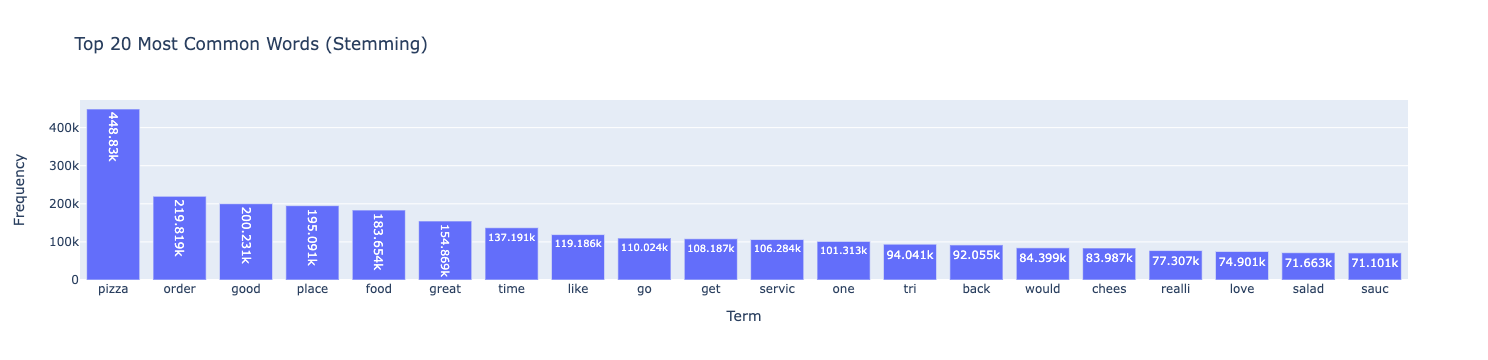

In [119]:
# Plot the number of open vs. closed
fig = px.bar(df_fdist_stemmed.head(20), x='Term', y='Frequency', title='Top 20 Most Common Words (Stemming)', text_auto = True)
fig.show()

In [121]:
# Determine the frequency of the words in the entire dataframe using the lemmitiz process
fdist_lemmatized = FreqDist(list(df['text_lemmatized'].explode()))
df_fdist_lemmatized = pd.DataFrame.from_dict(fdist_lemmatized, orient='index')
df_fdist_lemmatized.columns = ['Frequency']
df_fdist_lemmatized.index.name = 'Term'
df_fdist_lemmatized = df_fdist_lemmatized.reset_index().sort_values(by='Frequency', ascending=False)

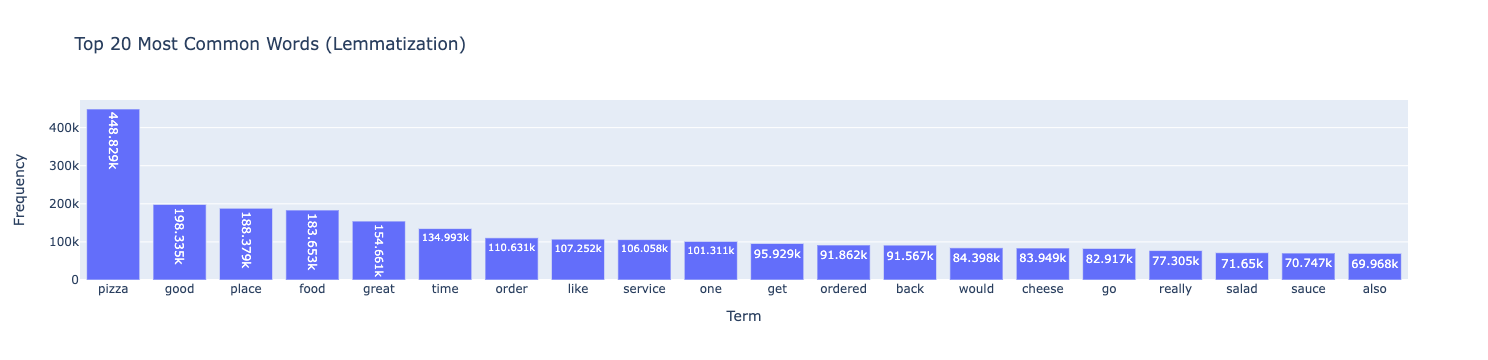

In [123]:
# Plot the number of open vs. closed
fig = px.bar(df_fdist_lemmatized.head(20), x='Term', y='Frequency', title='Top 20 Most Common Words (Lemmatization)', text_auto = True)
fig.show()